In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# import F1 score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
# import train
from sklearn.model_selection import train_test_split
# remove warnings
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import make_column_transformer
import numpy as np
import pandas as pd  



# import labelencoder
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('merged_df.csv', index_col=None)
# remove 

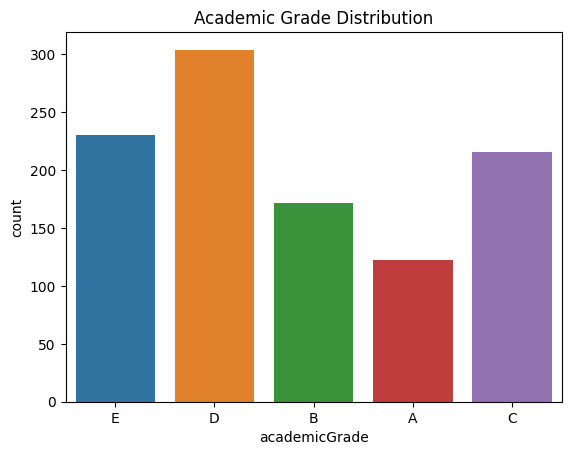

In [7]:
# looking at academic grade distribution

df["academicGrade"].value_counts()

# plot the distribution of academic grade
sns.countplot(x=df['academicGrade'], data=df)
plt.title('Academic Grade Distribution')
plt.show()
# Variables are not equally distributed, so we need to balance them

In [8]:
# remove absence_range, finalResult, 
df = df.drop(['absences_range', 'finalResult'], axis=1)
df = df[df['absences'] < 20]

### Data Transformation from non-object to object

In [9]:
# display only columns that are other than object
df.select_dtypes(exclude=['object']).columns

#  transform all non object to object type
df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']] = df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']].astype('object') 

In [6]:
df.select_dtypes(exclude=['object']).columns

Index(['age', 'absences', 'G1', 'G2', 'G3'], dtype='object')

### Selecting the columns categorical and numerical

In [7]:
columns_cat = df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G1', 'G2', 'G3',
       'academicGrade']]

continue_cols = df[['age','absences', 'G1', 'G2', 'G3']]

### Column Transformer
* MinMaxScaler is used to scale the numerical columns between 0 and 1
* OneHotEncoder is used to transform the categorical columns into numerical columns

In [8]:
X = df.drop('academicGrade', axis=1)
ct = make_column_transformer(
      (MinMaxScaler(),
       make_column_selector(dtype_include=np.number)),
      (OneHotEncoder(),
       make_column_selector(dtype_include=object)))

# Apply the column transformer to the data
X_preprocessed = ct.fit_transform(X)  

# Create a new dataframe with the preprocessing applied
feature_names = ct.get_feature_names_out()
new_df = pd.DataFrame(X_preprocessed, columns=feature_names)

### Pipeline of AI multi-classification model with the following steps:
* X is the preprocessed data and y is the target
* Splitting the data into train and test (80% and 20%), stratifying the target to have the same proportion of classes in both sets and shuffling the data for better results
* Dictionnary of the models parameters will be passed to the GridSearchCV
* print the result and display the chart of the best model

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linea

F1 score for LogisticRegression on train set: 0.8702709547226645
F1 score for LogisticRegression on test set: 0.773630266343385
Best parameters for LogisticRegression : {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
---------------------------------------------
Fitting 5 folds for each of 18 candidates, totalling 90 fits
F1 score for DecisionTreeClassifier on train set: 1.0
F1 score for DecisionTreeClassifier on test set: 1.0
Best parameters for DecisionTreeClassifier : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
---------------------------------------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits
F1 score for RandomForestClassifier on train set: 1.0
F1 score for RandomForestClassifier on test set: 0.9560896136519065
Best parameters for RandomForestClassifier : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
---------------------------------------------
Fitting 5 folds for each of 18 candidates, totalling 90 fits
F1 score for KNe

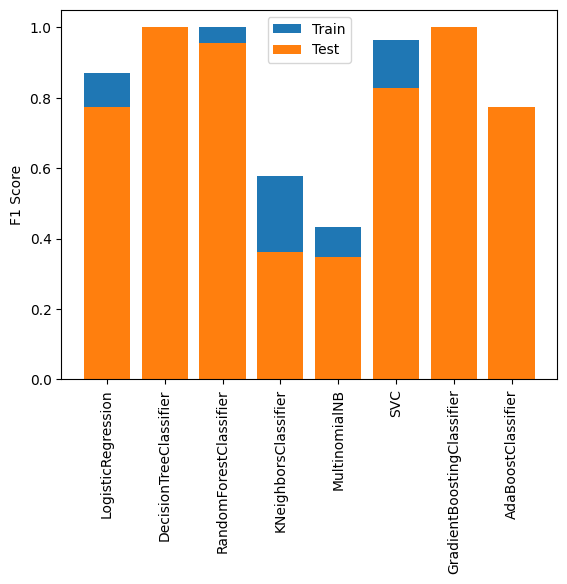

In [9]:
X = new_df
y = df['academicGrade']

le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y, shuffle=True)

# Define the parameter grids for each algorithm
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

nb_params = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

svm_params = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# add gradient boosting and adaboost
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}


# Create a list of models and their corresponding parameter grids
models = [
    (LogisticRegression(), lr_params),
    (DecisionTreeClassifier(), dt_params),
    (RandomForestClassifier(), rf_params),
    (KNeighborsClassifier(), knn_params),
    (MultinomialNB(), nb_params),
    (SVC(), svm_params),
    (GradientBoostingClassifier(), gb_params),
    (AdaBoostClassifier(), ab_params)
]

# Create lists to store the train and test scores for each model
train_scores = []
test_scores = []

# Loop over the models and their parameter grids from above
for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1) # n_jobs=-1 means use all processors
    grid.fit(X_train, y_train)
    
    # get the F1 score on the train set
    y_train_pred = grid.predict(X_train)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted') # average='weighted' takes label imbalance into account
    train_scores.append(train_f1)
    
    # get the F1 score on the test set
    y_test_pred = grid.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_scores.append(test_f1)
    
    # print the results
    print("F1 score for", model.__class__.__name__, "on train set:", train_f1)
    print("F1 score for", model.__class__.__name__, "on test set:", test_f1)
    print("Best parameters for", model.__class__.__name__, ":", grid.best_params_)
    print("---------------------------------------------")
    
# plot the results of the best model
model_names = [model.__class__.__name__ for model, _ in models]
plt.bar(model_names, train_scores, label='Train')
plt.bar(model_names, test_scores, label='Test')
plt.xticks(rotation=90)
plt.ylabel('F1 Score')
plt.legend()
plt.show()


### Confusion matrix

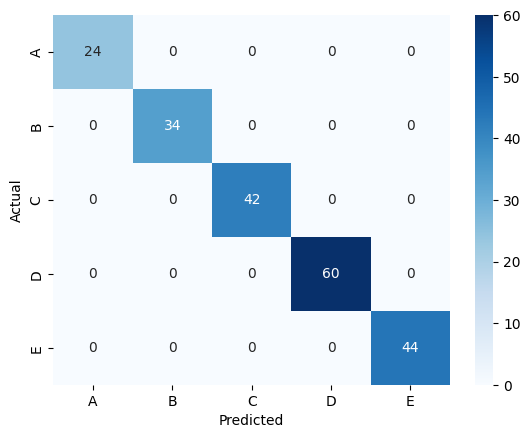

In [19]:
# choose gradient boosting model and its parameter grid 
# create the model
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=None, min_samples_split=2, n_estimators=50)

# create the parameter grid

# train the model 
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['A', 'B', 'C','D', 'E'], yticklabels=['A', 'B', 'C','D', 'E'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
